In [161]:
import gdax
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import pylab
import plotly.plotly as py
import plotly.graph_objs as go
from dateutil import parser

In [162]:
fig_size = plt.rcParams["figure.figsize"]
print "Current size:", fig_size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
print "Current size:", fig_size

Current size: [12.0, 9.0]
Current size: [12, 9]


In [163]:
client = gdax.PublicClient()

ETH = client.get_product_historic_rates('ETH-USD', granularity = 60 * 60 * 24)
eth = pd.DataFrame(ETH)

BTC = client.get_product_historic_rates('BTC-USD', granularity = 60 * 60 * 24)
btc = pd.DataFrame(BTC)

LTC = client.get_product_historic_rates('LTC-USD', granularity = 60 * 60 * 24)
ltc = pd.DataFrame(LTC)

In [164]:
for i in range(len(ETH)):
    eth[0][i] = (
    datetime.datetime.fromtimestamp(
        int(eth[0][i])
    ).strftime('%Y-%m-%d %H:%M:%S')
    )

for i in range(len(BTC)):
    btc[0][i] = (
    datetime.datetime.fromtimestamp(
        int(btc[0][i])
    ).strftime('%Y-%m-%d %H:%M:%S')
    )
    
for i in range(len(LTC)):
    ltc[0][i] = (
    datetime.datetime.fromtimestamp(
        int(ltc[0][i])
    ).strftime('%Y-%m-%d %H:%M:%S')
    )

C:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [165]:
for i in range(len(ETH)):
    eth[0][i] = parser.parse(eth[0][i])

for i in range(len(BTC)):
    btc[0][i] = parser.parse(btc[0][i])

for i in range(len(LTC)):
    ltc[0][i] = parser.parse(ltc[0][i])

C:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Program Files\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [168]:
eth.columns = ['Time', 'Low', 'High', 'Open', 'Close', 'Volume']
eth = eth.iloc[::-1]
eth = eth.reset_index(drop = True)

btc.columns = ['Time', 'Low', 'High', 'Open', 'Close', 'Volume']
btc = btc.iloc[::-1]
btc = btc.reset_index(drop = True)

ltc.columns = ['Time', 'Low', 'High', 'Open', 'Close', 'Volume']
ltc = ltc.iloc[::-1]
ltc = ltc.reset_index(drop = True)

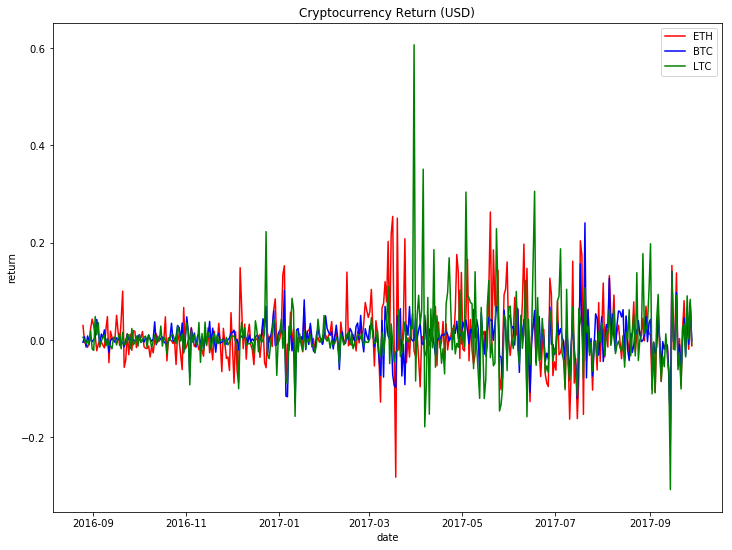

In [184]:
eth_close = np.diff(np.log(eth['Close']))
n = len(eth_close)
plt.plot(eth.iloc[1:len(eth), 0], eth_close, 'r', label = 'ETH')

btc_close = np.diff(np.log(btc['Close']))
n = len(btc_close)
plt.plot(btc.iloc[1:len(btc), 0], btc_close, 'b', label = 'BTC')

ltc_close = np.diff(np.log(ltc['Close']))
n = len(ltc_close)
plt.plot(ltc.iloc[1:len(ltc), 0],ltc_close, 'g', label = 'LTC')

plt.xlabel('date')
plt.ylabel('return')
plt.legend()
plt.title('Cryptocurrency Return (USD)')
plt.show()

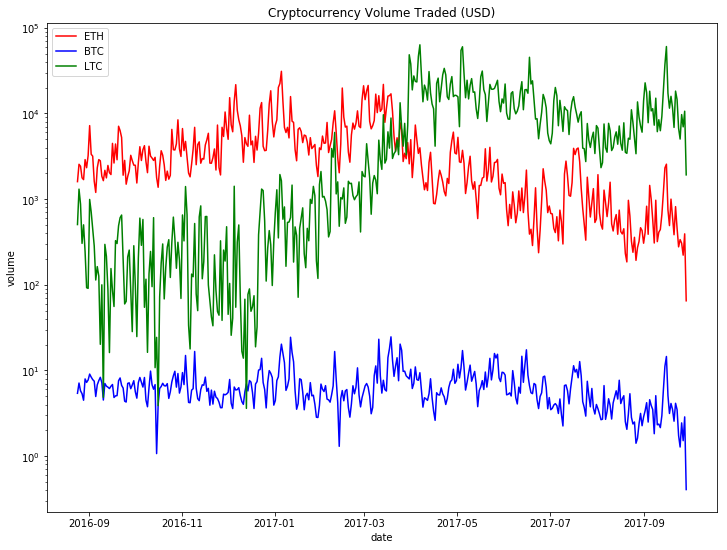

In [191]:
eth_volume = eth['Volume']/eth['Close']
plt.plot(eth.iloc[0:len(eth), 0], eth_volume, 'r', label = 'ETH')

btc_volume = btc['Volume']/btc['Close']
plt.plot(btc.iloc[0:len(btc), 0], btc_volume, 'b', label = 'BTC')

ltc_volume = ltc['Volume']/ltc['Close']
plt.plot(ltc.iloc[0:len(ltc), 0], ltc_volume, 'g', label = 'LTC')

plt.xlabel('date')
plt.ylabel('volume')
plt.yscale('log')
plt.legend()
plt.title('Cryptocurrency Volume Traded (USD)')
plt.show()

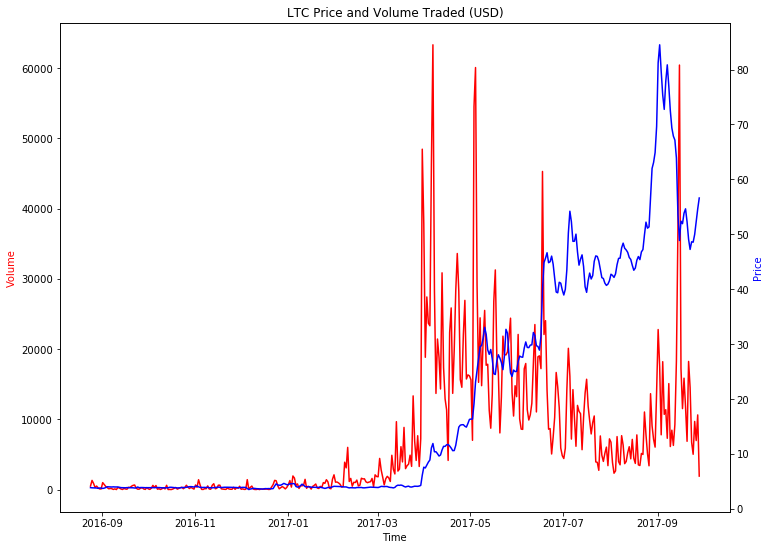

In [182]:
x = ltc.iloc[0:len(ltc), 0]
y1 = ltc_volume
y2 = ((ltc['Close']) + (ltc['Open']))/2

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'r')
ax2.plot(x, y2, 'b')

ax1.set_xlabel('Time')
ax1.set_ylabel('Volume', color='r')
ax2.set_ylabel('Price', color='b')

plt.title('LTC Price and Volume Traded (USD)')
plt.show()

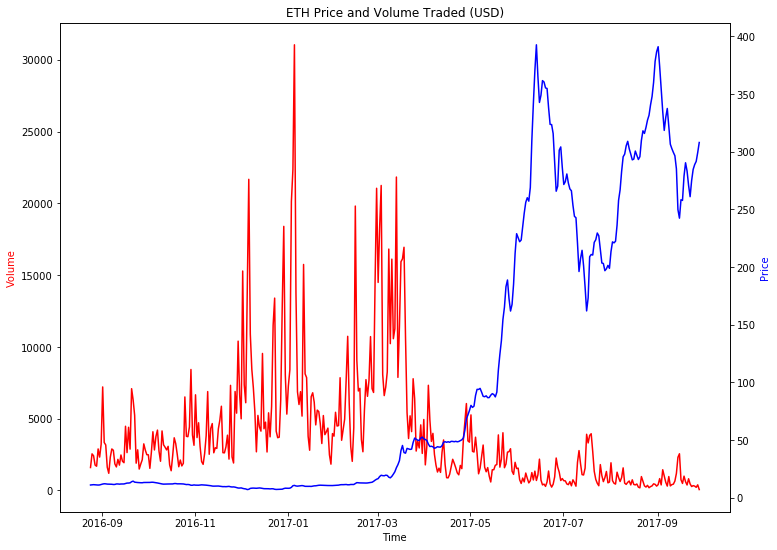

In [187]:
x = eth.iloc[0:len(eth), 0]
y1 = eth_volume
y2 = ((eth['Close']) + (eth['Open']))/2

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'r')
ax2.plot(x, y2, 'b')

ax1.set_xlabel('Time')
ax1.set_ylabel('Volume', color='r')
ax2.set_ylabel('Price', color='b')

plt.title('ETH Price and Volume Traded (USD)')
plt.show()

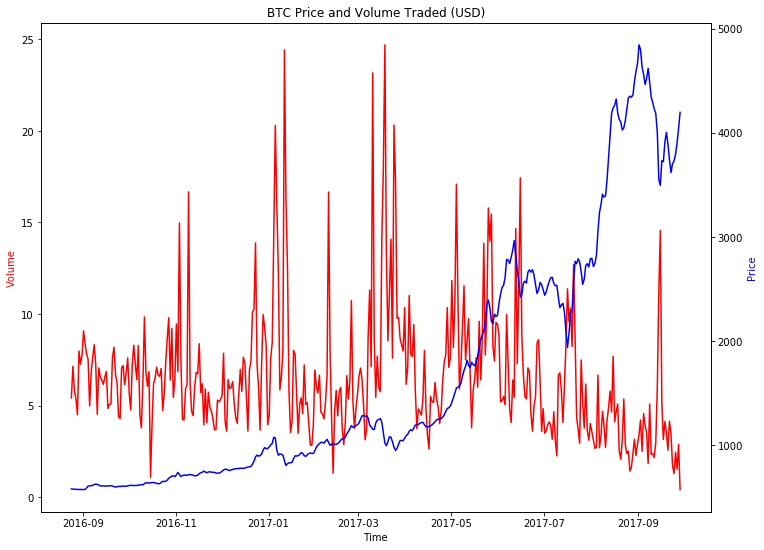

In [188]:
x = btc.iloc[0:len(btc), 0]
y1 = btc_volume
y2 = ((btc['Close']) + (btc['Open']))/2

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'r')
ax2.plot(x, y2, 'b')

ax1.set_xlabel('Time')
ax1.set_ylabel('Volume', color='r')
ax2.set_ylabel('Price', color='b')

plt.title('BTC Price and Volume Traded (USD)')
plt.show()

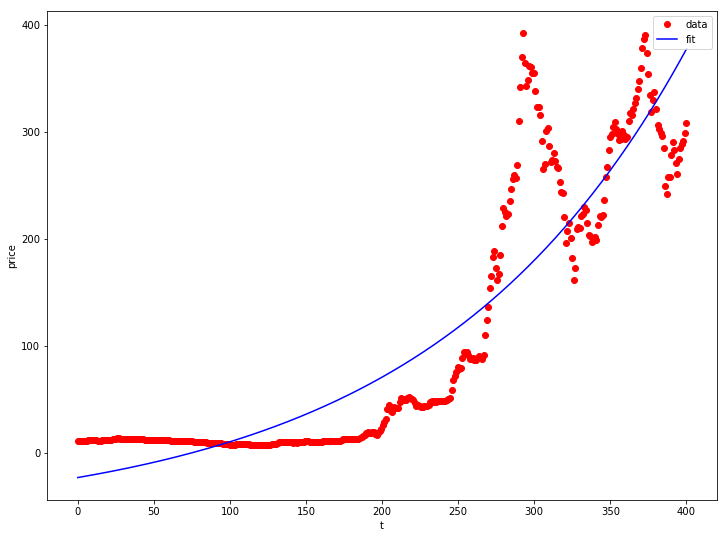

array([[  8.33632294e+01,   4.64966573e-03,  -1.26235226e+02],
       [  4.64966573e-03,   2.62303365e-07,  -6.90402196e-03],
       [ -1.26235226e+02,  -6.90402196e-03,   2.04262511e+02]])

In [186]:
x = np.linspace(0,400,num=400)
y = price.iloc[1:].values
plt.plot(x, y, 'ro', label='data')

def exponential_func(x, a, b, c):
    return a*np.exp(-b*x)+c

popt, pcov = curve_fit(exponential_func, x, y, p0 = [0,0,0])
plt.plot(x, exponential_func(x, *popt), 'b-', label='fit')
plt.xlabel('t')
plt.ylabel('price')
plt.legend()
plt.show()

pcov